In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from ipywidgets import widgets
from sklearn import preprocessing
from tensorflow import keras 
from tensorflow.keras import layers, regularizers,Model, utils
%matplotlib inline 
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.callbacks import TensorBoard
from datetime import time
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import plotly.express as px
from scipy.ndimage.filters import gaussian_filter
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras

from os import listdir
import os
#thanks to https://stackoverflow.com/users/218681/bernhard-kausler
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [30]:
drivePaths = find_csv_filenames("outputs")[0:1]
subsamplingPeriod = 2
sequenceLength = 8
smoothingSigma = 2

In [31]:
drivesWithLocation = []
drivesWithoutLocation = []
for drivePath in drivePaths:
    drive = pd.read_csv("outputs/"+drivePath)
#     print(drive)
    drive = drive.iloc[::subsamplingPeriod].copy(deep=True)
    driveWithoutLocation = drive.drop(columns=["Time", "Longitude", "Latitude"])
    drivesWithLocation.append(drive)
    drivesWithoutLocation.append(driveWithoutLocation)

In [32]:
normalizedDrives = []
for drive in drivesWithoutLocation:
    standard_scaler = preprocessing.StandardScaler()
    data_normalized = standard_scaler.fit_transform(drive)
    data_normalized = pd.DataFrame(data_normalized)
    normalizedDrives.append(data_normalized.to_numpy())

In [33]:
normalizedDrives[0]

array([[-1.47565339, -0.16880012, -0.00682611, ..., -1.47668369,
        -1.4758871 , -1.47606666],
       [-1.47565339, -0.16880012, -0.00682611, ..., -1.47668369,
        -1.4758871 , -1.47606666],
       [-1.47565339, -0.16880012, -0.00682611, ..., -1.47668369,
        -1.4758871 , -1.47606666],
       ...,
       [-0.28696016,  0.00229772, -2.13328651, ..., -0.29103584,
        -0.28644033, -0.29047971],
       [-0.31757065,  0.22265654, -2.04566482, ..., -0.32178824,
        -0.31721355, -0.32024829],
       [-0.3430264 ,  0.33265908, -2.26262674, ..., -0.35150562,
        -0.3423949 , -0.34394219]])

(8, 13)


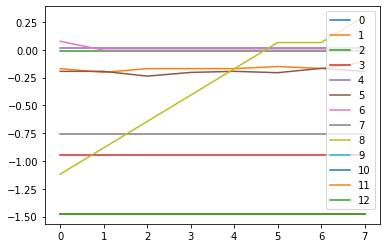

In [36]:
driveDataArr = normalizedDrives[0]
seq = driveDataArr[2000:(2000+sequenceLength),:]
# fig1 = go.Figure()
# fig1.add_trace(go.Scatter(x=scatterData.index, y=seq[:,0]))
# fig1.add_trace(go.Scatter(x=scatterData.index, y=scatterData.originalData, name="original data"))
print(seq.shape)
# fig1.show()
import matplotlib
from matplotlib import pyplot as plt
for i in range(13):
    plt.plot(range(sequenceLength), seq[:,i], label=str(i))
plt.legend()

(8, 13)


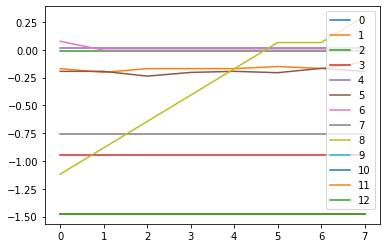

In [36]:
driveDataArr = normalizedDrives[0]
seq = driveDataArr[2000:(2000+sequenceLength),:]

lats = drivesWithLocation[0]["Latitude"]
longs = drivesWithLocation[0]["Longitude"]

for i in range(13):
    plt.plot(range(sequenceLength), seq[:,i], label=str(i))
plt.legend()

In [27]:
roughData = np.vstack(normalizedDrives[:])
print(roughData.shape)

(557, 13)


In [ ]:
for k in range(len(drivePaths)):
    print(drivePath[k])
    roughData = normalizedDrives[k]
    smoothData = -1*np.ones(shape=roughData.shape)
    features = range(roughData.shape[1])
    for curFeature in features:
        print("smoothing %s"%curFeature)

        smoothData[:,curFeature] = gaussian_filter(roughData[:,curFeature], sigma=smoothingSigma)#.rolling(window=sequenceLength, win_type='gaussian', center=True).mean(std=0.5)
    #     ewmaSmoothData[curFeature] = pd.DataFrame.ewm(data_normalized[curFeature], span=sequenceLength)

        #plot the original feature and the smoothed feature
        scatterData = pd.DataFrame({
        "index":range(roughData.shape[0]),
        "smoothData": smoothData[:,curFeature],
        #"ewmaSmoothData": ewmaSmoothData[curFeature],
        "originalData": roughData[:,curFeature],
        })
        scatterData.describe()

        fig1 = go.Figure()
    #     fig1.add_trace(go.Scatter(x=scatterData.index, y=scatterData.ewmaSmoothData, name="ewma smoothed data"))
        fig1.add_trace(go.Scatter(x=scatterData.index, y=scatterData.smoothData, name="gaussian smoothed data"))
        fig1.add_trace(go.Scatter(x=scatterData.index, y=scatterData.originalData, name="original data"))

        fig1.show()
    
    
#